In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import vapeplot
plt.rcParams['svg.fonttype'] = 'none'
%matplotlib inline

from datetime import datetime
def timestamp(): return datetime.today().strftime('%Y%m%d')


In [2]:
# add some noise to the feature for joyplot
def jitter_feat(df,feat):
    tran = []
    c={}
    for ind,ele in df.iterrows():
        if c.get(ele['baker'])==None: c[ele['baker']]=[ele[feat]]
        else: c[ele['baker']].append(ele[feat])
    for ind,ele in df.iterrows():
        if ele['episode']==6:
            tran.append(np.random.normal(0,0.5,1)[0])
        else : tran.append(ele[feat])
    df[feat]=tran
    return df
def return_index(df):
    ind = []
    ylabs=[]
    i=0
    n=None
    for name in df['baker']:
        if n==None: 
            ylabs.append(name)
            n=name
        if n!=name: 
            i+=1
            n=name
            ylabs.append(name)
        ind.append(i)
    df['ind']=ind
    return df

In [169]:
places = {
    'David':1,
    'Alice':2,
    'Steph':2,
    'Rosie':3,
    'Henry':4,
    'Michael':5,
    'Priya':6,
    'Helena':7,
    'Michelle':7,
    'Phil':8,
    'Amelia':9,
    'Jamie':10
    'Dan':11
}

In [319]:
df = pd.read_csv("../RESULTS/deepbake.s10.predictions.fixed.tsv",sep="\t")
df.head()

,season,baker,week,tech_mean,tech,starbaker_mean,starbaker,judge_fav_mean,judge_fav,judge_unfav_mean,judge_unfav,place,deepbake_tier,week_eliminated,deepbake_prediction,winner_prob,finalist_prob,third_fourth_prob,fifth_seventh_prob,eighth_below_prob
0,10,Alice,1,5.00,5,0.00,0,0.00,0,0.00,0,2,1,10,1,10.98,29.22,16.20,27.80,26.78
1,10,Alice,2,3.00,1,0.50,1,0.50,1,0.00,0,2,1,10,1,36.82,85.81,2.42,9.69,2.09
2,10,Alice,3,4.33,7,0.33,0,0.33,0,0.33,1,2,1,10,1,15.85,36.42,18.81,28.37,16.40
3,10,Alice,4,5.25,8,0.25,0,0.25,0,0.25,0,2,1,10,1,19.81,42.14,25.51,29.55,2.79
4,10,Alice,5,5.40,6,0.20,0,0.20,0,0.20,0,2,1,10,1,7.78,50.49,19.54,27.26,2.71


In [28]:
cols = list(reversed(['#00247d', '#787095', '#c6c6a9', '#d57e67', '#cf142b']))
colr = {}
for i,e in enumerate(cols): colr[i]=e
df['colr'] = df['place'].map(colr)

In [352]:
vap = ['#4a354f', '#9239f6', '#ff0076', '#ff4373', '#ff6b58','#ffbf58']

#['#4a354f', '#793d91', '#c037af', '#fe506b', '#ff907a']
#['#4a354f', '#73398c', '#ae33ab', '#fb067d', '#ff6b58']

pal = sns.blend_palette(vap,n_colors=100)

/Users/tacitus/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: sortlevel is deprecated, use sort_index(level= ...)
  This is separate from the ipykernel package so we can avoid doing imports until


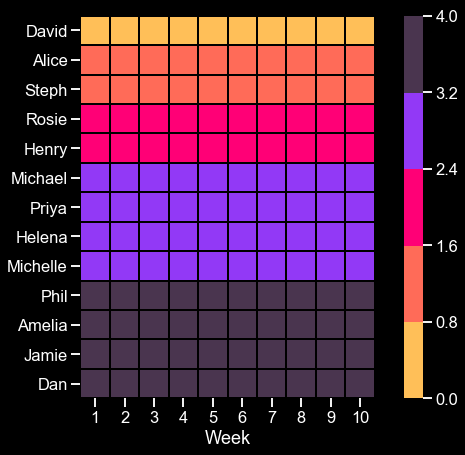

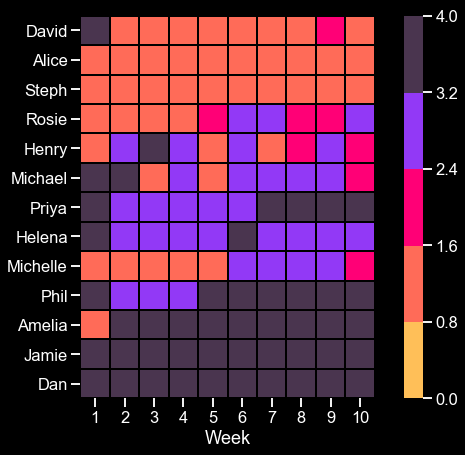

In [348]:
sns.set(style="ticks", context="talk")
plt.style.use("dark_background")

df = pd.read_csv("../RESULTS/deepbake.s10.predictions.fixed.tsv",sep="\t")
df=df.sort_values(by=['place','season'])
bakers = df.loc[df['week']==1]['baker']

probs = ['deepbake_tier','deepbake_prediction']

for ft in probs:
    mat = df.pivot("baker","week",ft)
    mat = sort_mat(mat,bakers)
    f, ax = plt.subplots(1,1,figsize=(13/1.5,10/1.5))
    sns.heatmap(
    mat,
    cmap=['#ffbf58','#ff6b58','#ff0076','#9239f6','#4a354f'],
    linewidths=1,
    ax=ax,
    square=True,
    robust=True,
    vmin=0,
    vmax=4,
    #center=,
    linecolor='#000000',
    #cbar=False,

    )
    ax.set_xlabel("Week")
    ax.set_ylabel('')
    f.tight_layout()
    f.savefig("../FIGURES/{}_hm_cb.svg".format(ft),dpi=500)
    f.savefig("../FIGURES/{}_hm_cb.png".format(ft),dpi=500)


/Users/tacitus/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: sortlevel is deprecated, use sort_index(level= ...)
  This is separate from the ipykernel package so we can avoid doing imports until


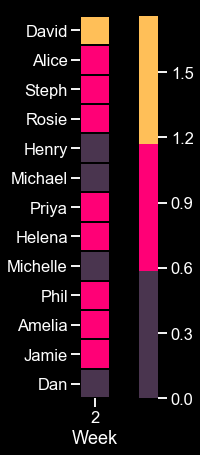

In [362]:
sns.set(style="ticks", context="talk")
plt.style.use("dark_background")

df = pd.read_csv("../RESULTS/deepbake.s10.results.txt",sep="\t")
bakers = df.loc[df['week']==1]['baker']

probs = ['deepbake_eliminated']
#['week_eliminated']
#['deepbake_eliminated']
#['deepbake_tier','deepbake_prediction']
pal = sns.blend_palette(vap,n_colors=10)
for ft in probs:
    t = df.loc[df['lab']==ft]
    mat = t.pivot("baker","week",'key')
    mat = sort_mat(mat,bakers)
    f, ax = plt.subplots(1,1,figsize=(13/1.5,10/1.5))
    sns.heatmap(
    mat,
    cmap=['#4a354f','#ff0076','#ffbf58'],
    #pal,
    #['#ffbf58','#ff6b58','#ff0076','#9239f6','#4a354f'],
    linewidths=1,
    ax=ax,
    square=True,
    robust=True,
    #annot=True,
    #vmin=0,
    #vmax=4,
    #center=,
    linecolor='#000000',
    #cbar=False,

    )
    ax.set_xlabel("Week")
    ax.set_ylabel('')
    f.tight_layout()
    f.savefig("../FIGURES/{}_hm_res.svg".format(ft),dpi=500)
    f.savefig("../FIGURES/{}_hm_res.png".format(ft),dpi=500)

/Users/tacitus/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/tacitus/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/tacitus/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

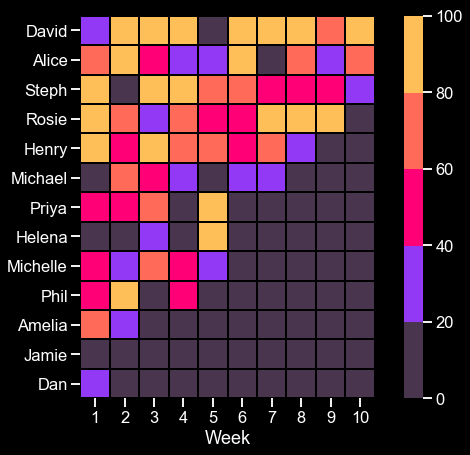

In [39]:
def sort_mat(mat,bakers):
    mat.index = pd.CategoricalIndex(mat.index, categories=bakers)
    mat.sortlevel(level=0, inplace=True)
    return mat
def minmax(df,ft):
    dat = df[ft]
    scal = [(x-min(dat))/(max(dat)-min(dat))*100 for x in dat]
    return scal
def minmax_week(df,ft):
    dfs = []
    for w in set(df['week']):
        t = df.loc[df['week']==w]
        #t['tech'] = np.where(df['tech']==0,15,df['tech'])
        t[ft] = np.where(t[ft]==0,14-w,t[ft])
        t[ft] = minmax(t,ft)
        t[ft]= 100-t[ft]
        dfs.append(t)
    return pd.concat(dfs)
sns.set(style="ticks", context="talk")
plt.style.use("dark_background")

df = pd.read_csv("../RESULTS/deepbake.s10.predictions.fixed.tsv",sep="\t")

df=df.sort_values(by=['place','season'])
bakers = df.loc[df['week']==1]['baker']

probs = ['winner_prob','finalist_prob','third_fourth_prob','fifth_seventh_prob','eighth_below_prob',
        'tech','tech_mean','judge_fav','judge_fav_mean','judge_unfav','judge_unfav_mean','starbaker','starbaker_mean'
        ]

vap = ['#4a354f', '#ffbf58','#ff6b58', '#ff4373','#ff0076','#9239f6']

#['#4a354f', '#9239f6', '#ff0076', '#ff4373', '#ff6b58','#ffbf58']

vap = ['#4a354f','#9239f6','#ff0076','#ff6b58','#ffbf58']
pal = sns.blend_palette((vap),n_colors=10)

probs = ['tech',]
for ft in probs:
    #df[ft] = minmax(df,ft)
    df = minmax_week(df,ft)
    #print(df)
    mat = df.pivot("baker","week",ft)#'norm')
    mat = sort_mat(mat,bakers)
    f, ax = plt.subplots(1,1,figsize=(13/1.5,10/1.5))
    sns.heatmap(
    mat,
    cmap=
        ['#4a354f','#9239f6','#ff0076','#ff6b58','#ffbf58'],
        #pal,
    linewidths=1,
    ax=ax,
    square=True,
    robust=True,
    #vmin=0,
    #vmax=100,
    #center=,
    linecolor='#000000',
    cbar=True,

    )
    ax.set_xlabel("Week")
    ax.set_ylabel('')
    f.tight_layout()
    f.savefig("../FIGURES/{}_hm_wk.svg".format(ft),dpi=500)
    f.savefig("../FIGURES/{}_hm_wk.png".format(ft),dpi=500)


/Users/tacitus/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: sortlevel is deprecated, use sort_index(level= ...)
  This is separate from the ipykernel package so we can avoid doing imports until


Text(26.921874999999996, 0.5, '')

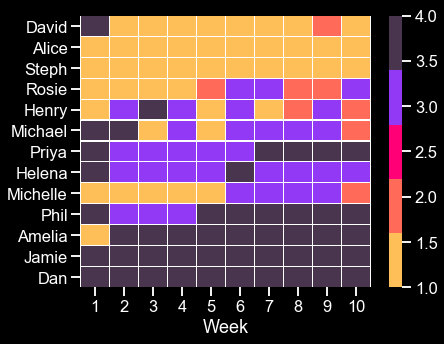

In [365]:
def sort_mat(mat,bakers):
    mat.index = pd.CategoricalIndex(mat.index, categories=bakers)
    mat.sortlevel(level=0, inplace=True)
    return mat

df = pd.read_csv("../RESULTS/deepbake.s10.predictions.fixed.tsv",sep="\t")
df=df.sort_values(by=['place','season'])
bakers = df.loc[df['week']==1]['baker']

sns.set(style="ticks", context="talk")
plt.style.use("dark_background")

df=df.sort_values(by=['place','season'])
bakers = df.loc[df['week']==1]['baker']

probs = ['winner_prob','finalist_prob','third_fourth_prob','fifth_seventh_prob','eighth_below_prob']

mat = df.pivot("baker","week","deepbake_prediction")#probs[4])
mat = sort_mat(mat,bakers)
f, ax = plt.subplots(1,1,figsize=(1*len(bakers)/2,5))
sns.heatmap(
    mat,
    cmap=['#ffbf58','#ff6b58','#ff0076','#9239f6','#4a354f'],
    linewidths=.25,
    ax=ax,
    #center=25,
    

)
ax.set_xlabel("Week")
ax.set_ylabel('')

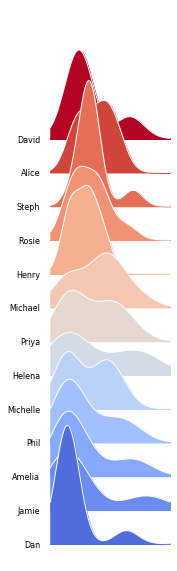

In [34]:
import joypy
import matplotlib
nrow=1
ncol=len(set(df['place']))
sz=3.5
pal = matplotlib.colors.ListedColormap(cols)
labs = ['1st Place','Runner-Up','3rd-4th Place','5th-7th Place','8th and Below']
places = [0,1,2]

tmp = df.sort_values(by=['place','season'])
tmp = return_index(tmp)

vapeplot.font_size(8)
f, ax = joypy.joyplot(
        tmp,
        by="ind",
        column="tech",
        linewidth=1, 
        legend=False, 
        figsize=(2.5,8),
        colormap=matplotlib.cm.coolwarm_r,
        linecolor="w",
        labels=ylabs,
        xlabels=False,
        overlap=3,
        bins=10,
        grid=False,
        #title='Technical Challenge'
        #grid=False,fill=False,background='k',linecolor='w'    
)
#f.tight_layout()
#f.savefig("../FIGURES/gbbo.tech.joyplot.png",dpi=300)

In [298]:
df

,season,baker,week,tech_mean,tech,starbaker_mean,starbaker,judge_fav_mean,judge_fav,judge_unfav_mean,...,place,deepbake_tier,week_eliminated,deepbake_prediction,winner_prob,finalist_prob,third_fourth_prob,fifth_seventh_prob,eighth_below_prob,norm
30,10,David,1,10.00,10,0.00,0,0.00,0,0.00,...,1,0,10,4,6.60,23.72,11.38,30.20,34.70,0.158881
31,10,David,2,6.00,2,0.00,0,0.50,1,0.00,...,1,0,10,1,19.75,63.39,4.41,19.08,13.12,0.478832
32,10,David,3,4.67,2,0.00,0,0.33,0,0.00,...,1,0,10,1,19.61,46.84,21.33,19.34,12.50,0.475426
33,10,David,4,4.00,2,0.00,0,0.50,1,0.00,...,1,0,10,1,11.98,63.45,18.25,15.98,2.32,0.289781
34,10,David,5,5.00,9,0.00,0,0.60,1,0.00,...,1,0,10,1,22.28,72.76,13.97,12.88,0.38,0.540389
35,10,David,6,4.50,2,0.00,0,0.50,0,0.00,...,1,0,10,1,16.59,66.55,21.10,9.98,2.37,0.401946
36,10,David,7,4.14,2,0.00,0,0.57,1,0.00,...,1,0,10,1,31.64,62.12,32.73,3.60,1.54,0.768127
37,10,David,8,3.75,1,0.00,0,0.63,1,0.00,...,1,0,10,1,24.04,87.06,10.81,1.46,0.68,0.583212
38,10,David,9,3.56,2,0.00,0,0.56,0,0.11,...,1,0,10,1,27.73,65.74,30.10,2.58,1.58,0.672993
39,10,David,10,3.30,1,0.00,0,0.50,0,0.10,...,1,0,10,1,34.73,86.44,5.28,4.88,3.40,0.843309


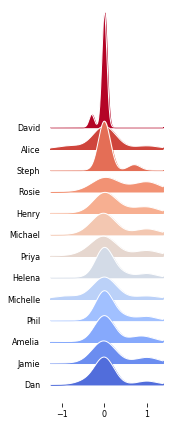

In [39]:
tmp = df.sort_values(by=['place','season'])
tmp = jitter_feat(tmp,'bad')
tmp = return_index(tmp)
vapeplot.font_size(8)
f, ax = joypy.joyplot(
        tmp,
        by="ind",
        column="bad",
        linewidth=1, 
        legend=False, 
        figsize=(2.5,6),
        colormap=matplotlib.cm.coolwarm_r,
        linecolor="w",
        labels=ylabs,
        xlabels=True,
        overlap=3,
        bins=20,
        grid=False,
        #title='Unfavored'
        #grid=False,fill=False,background='k',linecolor='w'    
)